In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
N = 4
V = np.zeros((N, N), dtype=float)
gamma = 1.0
theta = 1e-4

actions = [(-1,0),(1,0),(0,-1),(0,1)]

def step(i, j, a):
    ni, nj = i + a[0], j + a[1]
    if ni < 0 or ni >= N or nj < 0 or nj >= N:
        return i, j
    return ni, nj

while True:
    delta = 0
    V_new = V.copy()

    for i in range(N):
        for j in range(N):
            if (i, j) == (N-1, N-1):
                continue

            v = 0.0
            for a in actions:
                ni, nj = step(i, j, a)
                v += 0.25 * (-1 + float(V[ni, nj])) #Bellman

            delta = max(delta, abs(v - V[i, j]))
            V_new[i, j] = v

    V = V_new
    if delta < theta:
        break

print(V)


[[-59.42367735 -57.42387125 -54.2813141  -51.71012579]
 [-57.42387125 -54.56699476 -49.71029394 -45.13926711]
 [-54.2813141  -49.71029394 -40.85391609 -29.99766609]
 [-51.71012579 -45.13926711 -29.99766609   0.        ]]


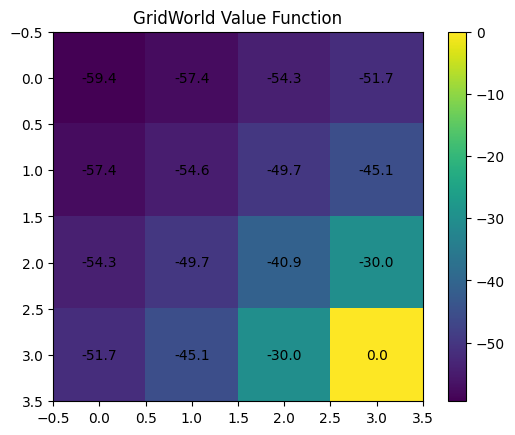

In [3]:
import matplotlib.pyplot as plt

plt.imshow(V)
for i in range(4):
    for j in range(4):
        plt.text(j, i, f"{V[i,j]:.1f}", ha="center", va="center")

plt.colorbar()
plt.title("GridWorld Value Function")
plt.show()
